# Week6&7&8 (Wuwei Zhang)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
import torch

def load_dataset():
    mndata = MNIST('C:/Users/Zhang/python-mnist/data')
    A_train, labels_train = map(np.array, mndata.load_training()) 
    A_test, labels_test = map(np.array, mndata.load_testing()) 
    A_train = A_train/255.0
    A_test = A_test/255.0
    
    return A_train, A_test, labels_train, labels_test

A_train, A_test, labels_train, labels_test = load_dataset()

In [3]:
# %% #Turn all data into torch tensors

A_train = torch.from_numpy(A_train).float()
A_test = torch.from_numpy(A_test).float()

labels_train_ = torch.from_numpy(labels_train).float().type(torch.LongTensor)
labels_test_ = torch.from_numpy(labels_test).float().type(torch.LongTensor)

## Shallow but wide NN (few layers,many weights)
* F1(x) = W1*sigma(W0x + b0) + b1

In [4]:
d = 784 # input, 784 pixels in an image
h = 64 # the number of hidden units
k = 10 # output, 10 different labels

# Initialize weights and biases

alpha = 1/np.sqrt(784)
W0 = (-alpha - alpha) * torch.rand(h, d) + alpha
W0.requires_grad = True #Tells pytorch to keep track of the gradient for these variables
W1 = (-alpha - alpha) * torch.rand(k, h) + alpha
W1.requires_grad = True
b0 = (-alpha - alpha) * torch.rand( h) + alpha
b0.requires_grad = True
b1 = (-alpha - alpha) * torch.rand(k) + alpha
b1.requires_grad = True
    
# Adam is a more advanced version of gradient descent. 
# We will use cross entropy with respect to weight for our loss function, 
# and ReLU for our non-linearity.

#Define optimizer 
learning_rate = 1e-3
optimizer = torch.optim.Adam([W0, W1, b0, b1], lr = learning_rate)
    
#activation function
activation = torch.nn.ReLU()
    
target_accuracy = 0.99
accuracy = 0
while accuracy<target_accuracy:
        
    #clears all gradients from the previous step, so you don't accumulate them
    optimizer.zero_grad()
        
    #NN layers to be put here
    output = W1@activation(W0@A_train.T+b0[:,None])+b1[:,None]
    
    Pred_labels = torch.argmax(output.T, axis = 1)
    accuracy =( 60000- np.count_nonzero(Pred_labels - labels_train_))/60000
    
        
    # cross entropy loss takes the probabilities generated by the softmax 
    # function and measures the distance from the truth values.
    loss = torch.nn.functional.cross_entropy(output.T, labels_train_)
        
    #Computes derivatives of the loss with respect to W
    loss.backward()
        
    #optimizer takes a step based on the gradients of the parameters
    optimizer.step()
    
        
    
# Use test set to test final weights
test_output =  W1@activation(W0@A_test.T+b0[:,None])+b1[:,None]
test_Pred_labels = torch.argmax(test_output.T, axis = 1)
test_accuracy =(10000- np.count_nonzero(test_Pred_labels - labels_test_))/10000
print(test_accuracy)

0.9707


## narrow but deeper network (many layers, few weights)
* F2(x) = W2*sigma(W1*sigma(W0x + b0) + b1) + b2  

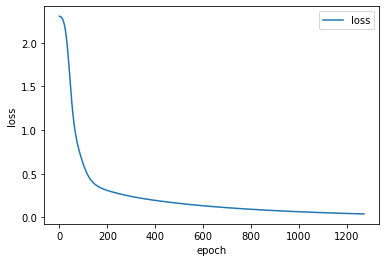

In [4]:
d = 784 # input, 784 pixels in an image
h0 = 32 # the number of first hidden units
h1 = 32 # the number of second hidden units
k = 10 # output, 10 different labels  
 
# Initialize weights and biases

alpha = 1/np.sqrt(784)
W0 = (-alpha - alpha) * torch.rand(h0, d) + alpha
W0.requires_grad = True #Tells pytorch to keep track of the gradient for these variables
W1 = (-alpha - alpha) * torch.rand(h1, h0) + alpha
W1.requires_grad = True
W2 = (-alpha - alpha) * torch.rand(k, h1) + alpha
W2.requires_grad = True
b0 = (-alpha - alpha) * torch.rand(h0) + alpha
b0.requires_grad = True
b1 = (-alpha - alpha) * torch.rand(h1) + alpha
b1.requires_grad = True
b2 = (-alpha - alpha) * torch.rand(k) + alpha
b2.requires_grad = True

#Define optimizer   
learning_rate = 1e-3
optimizer = torch.optim.Adam([W0, W1, W2, b0, b1, b2], lr = learning_rate)

#activation function
activation = torch.nn.ReLU()

target_accuracy = 0.99
accuracy = 0
record_loss = []
while accuracy<target_accuracy:
        
    #clears all gradients from the previous step, so you don't accumulate them
    optimizer.zero_grad()
        
    #NN layers to be put here
    output = W2@activation(W1@activation(W0@A_train.T+b0[:,None])+b1[:,None]) + b2[:,None]
    
    Pred_labels = torch.argmax(output.T, axis = 1)
    accuracy =( 60000- np.count_nonzero(Pred_labels - labels_train_))/60000
    
        
    # cross entropy loss takes the probabilities generated by the softmax 
    # function and measures the distance from the truth values.
    loss = torch.nn.functional.cross_entropy(output.T, labels_train_)
    record_loss.append(loss)
        
    #Computes derivatives of the loss with respect to W
    loss.backward()
        
    #optimizer takes a step based on the gradients of the parameters
    # updates the weights using gradient of loss with respect to the weights
    optimizer.step()



# Use test set to test final weights
test_output =  W2@activation(W1@activation(W0@A_test.T+b0[:,None])+b1[:,None]) + b2[:,None]
test_Pred_labels = torch.argmax(test_output.T, axis = 1)
test_accuracy =(10000- np.count_nonzero(test_Pred_labels - labels_test_))/10000

plt.plot(list(range(len(record_loss))), record_loss, label="loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()